<a href="https://colab.research.google.com/github/yunusemravci/ML-Assignments/blob/master/A5_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import scipy.io
import numpy as np
from skimage.transform import resize
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

#### Load train and test set

In [ ]:
train_set = scipy.io.loadmat('/content/drive/MyDrive/HW5-ML/trainset.mat')
test_set = scipy.io.loadmat('/content/drive/MyDrive/HW5-ML/testset.mat')

#### Extracting Images and Labels

In [ ]:
# Extract training images and labels
train_images = train_set['X']
train_labels = train_set['Y']

# Extract test images and labels
test_images = test_set['X']
test_labels = test_set['Y']

#### Resize and Normalize The Images

In [ ]:
# Resize images to 32x32 and normalize
train_images_resized = np.array([resize(image, (32, 32)) for image in train_images])
test_images_resized = np.array([resize(image, (32, 32)) for image in test_images])

train_images_normalized = train_images_resized / 255.0
test_images_normalized = test_images_resized / 255.0

#### One-hot Encoding

In [ ]:
# Convert labels to one-hot encoded vectors
train_labels_one_hot = to_categorical(train_labels, num_classes=43)
test_labels_one_hot = to_categorical(test_labels, num_classes=43)

#### CNN Model

In [ ]:
# Define the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the 2D arrays for fully connected layers
model.add(Flatten())

# Dense layers
model.add(Dense(512, activation='softmax'))
model.add(Dropout(0.5))  # Dropout to avoid overfitting
model.add(Dense(43, activation='softmax'))  # 43 classes for GTSRB



#### Compile and Fit the Model

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images_normalized, train_labels_one_hot,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/20
981/981 [==============================] - 60s 59ms/step - loss: 3.3127 - accuracy: 0.0695 - val_loss: 8.4228 - val_accuracy: 0.0000e+00
Epoch 2/20
981/981 [==============================] - 66s 67ms/step - loss: 2.4785 - accuracy: 0.2580 - val_loss: 23.6832 - val_accuracy: 0.0000e+00
Epoch 3/20
981/981 [==============================] - 55s 56ms/step - loss: 1.3774 - accuracy: 0.5436 - val_loss: 26.7702 - val_accuracy: 0.0287
Epoch 4/20
981/981 [==============================] - 62s 63ms/step - loss: 0.9373 - accuracy: 0.6940 - val_loss: 34.3947 - val_accuracy: 0.0479
Epoch 5/20
981/981 [==============================] - 60s 61ms/step - loss: 0.6539 - accuracy: 0.7898 - val_loss: 36.5606 - val_accuracy: 0.0393
Epoch 6/20
981/981 [==============================] - 57s 58ms/step - loss: 0.4676 - accuracy: 0.8513 - val_loss: 35.4270 - val_accuracy: 0.0485
Epoch 7/20
981/981 [==============================] - 63s 64ms/step - loss: 0.3500 - accuracy: 0.8919 - val_loss: 39.3450 -

#### Classification Report

In [ ]:
# Make predictions
predictions = model.predict(test_images_normalized)
predicted_classes = np.argmax(predictions, axis=1)
# Compute the classification report

print(classification_report(np.argmax(test_labels_one_hot, axis=1), predicted_classes, zero_division=0))

395/395 [==============================] - 6s 14ms/step
              precision    recall  f1-score   support

           0       0.40      0.78      0.53        60
           1       0.60      0.98      0.75       720
           2       0.70      0.98      0.81       660
           3       0.94      0.93      0.93       420
           4       0.90      0.96      0.93       690
           5       0.96      0.99      0.98       720
           6       0.98      0.99      0.99       270
           7       0.97      0.99      0.98       210
           8       0.57      0.99      0.72       150
           9       0.99      0.92      0.96       360
          10       0.86      0.80      0.83       390
          11       0.91      0.48      0.63        60
          12       0.51      0.96      0.67       750
          13       0.89      1.00      0.94        90
          14       0.77      0.53      0.63        90
          15       0.78      0.95      0.85       120
          16       0.79  

#### Model Evaluation

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images_normalized, test_labels_one_hot)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

395/395 [==============================] - 6s 16ms/step - loss: 9.9278 - accuracy: 0.7547
Test accuracy: 75.47%


#### Plot Training and Validation

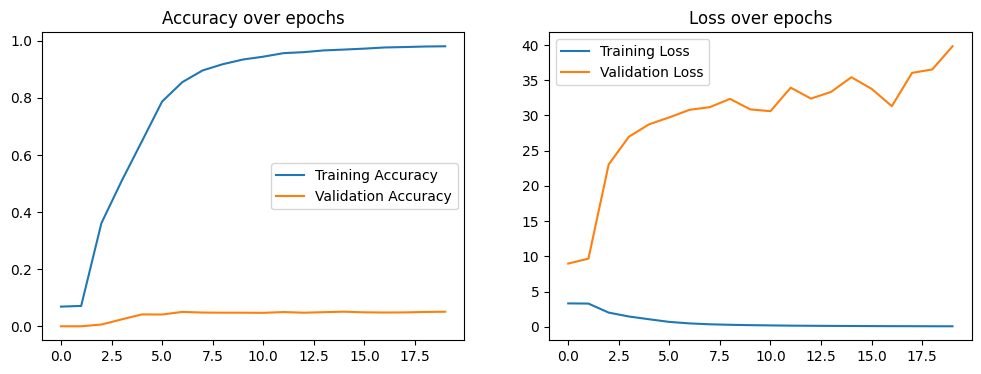

In [ ]:
# Plot training and validation metrics
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')

plt.show()